In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "booth_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
#Lists
lat_long = []
cities = []

#Random Generation
random_lat = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
random_long = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_longs = zip(random_lat, random_long)

#City name near each randomly generated coordinate
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

In [3]:
# Requests

In [4]:
#Empty Lists
latitudes = []
longitudes = []
temps = []
feel_like = []
humid = []
pressures = []
speeds = []
cloudiness = []
cities_found = []

for i in range(len(cities)):
    city = cities[i]
    
    #URL
    units = "imperial"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"
    #print(url)

    #Request data
    response = requests.get(url)
    #print(response.status_code)

    if response.status_code == 200:
        data = response.json()
        #pprint(data)      
    
        try:
            lat = data["coord"]["lat"]
            long = data["coord"]["lon"]
            temp = data["main"]["temp"]
            feels_like = data["main"]["feels_like"]
            humidity = data["main"]["humidity"]
            pressure = data["main"]["pressure"]
            speed = data["wind"]["speed"]
            clouds = data["clouds"]["all"]
            city_name = data["name"]

            #replace and save
            latitudes.append(lat)
            longitudes.append(long)
            temps.append(temp)
            feel_like.append(feels_like)
            humid.append(humidity)
            pressures.append(pressure)
            speeds.append(speed)
            cloudiness.append(clouds)
            cities_found.append(city_name)
        except Exception as e:
            print(f"Through exception for the city {city}: {e}")
    
    elif response.status_code == 404:
        print(f"Missing data for {city}")    
    else:
        print(response.status_code)
        print("Error: API broken")
        
    if (i % 5 == 0):
        print(f"Got data for city index: {i} of {len(cities)}")
        
        #sleep for 1 second between requests
        time.sleep(1)
        
#DataFrame
df = pd.DataFrame()
df["City"] = cities_found
df["Latitude"] = latitudes
df["Longitude"] = longitudes
df["Temperature"] = temps
df["Feels_Like"] = feel_like
df["Humidity"] = humid
df["Pressure"] = pressures
df["Wind_Speed"] = speeds
df["Cloudiness"] = cloudiness

df.head(10)

Got data for city index: 0 of 607
Missing data for illoqqortoormiut
Got data for city index: 5 of 607
Got data for city index: 10 of 607
Got data for city index: 15 of 607
Got data for city index: 20 of 607
Got data for city index: 25 of 607
Got data for city index: 30 of 607
Got data for city index: 35 of 607
Got data for city index: 40 of 607
Got data for city index: 45 of 607
Got data for city index: 50 of 607
Missing data for mys shmidta
Missing data for taolanaro
Got data for city index: 55 of 607
Got data for city index: 60 of 607
Got data for city index: 65 of 607
Missing data for mutsamudu
Got data for city index: 70 of 607
Got data for city index: 75 of 607
Missing data for play cu
Got data for city index: 80 of 607
Got data for city index: 85 of 607
Got data for city index: 90 of 607
Missing data for ust-bolsheretsk
Got data for city index: 95 of 607
Missing data for jinchengjiang
Got data for city index: 100 of 607
Got data for city index: 105 of 607
Got data for city index:

,City,Latitude,Longitude,Temperature,Feels_Like,Humidity,Pressure,Wind_Speed,Cloudiness
0,Trairi,-3.2778,-39.2689,76.24,77.52,84,1010,6.82,97
1,Khatanga,71.9667,102.5000,30.16,23.70,79,1010,6.44,87
2,Ilulissat,69.2167,-51.1000,35.60,30.70,69,1036,5.75,75
3,Ushuaia,-54.8000,-68.3000,41.00,41.00,100,989,2.73,75
4,Coquimbo,-29.9533,-71.3436,55.40,55.06,94,1017,2.30,0
5,Bambous Virieux,-20.3428,57.7575,76.05,77.49,88,1017,11.50,75
6,Bluff,-46.6000,168.3333,55.99,55.29,85,1014,13.00,76
7,Hithadhoo,-0.6000,73.0833,82.36,86.22,66,1013,1.05,97
8,Kaitangata,-46.2817,169.8464,52.21,50.38,69,1014,9.37,92
9,Vanimo,-2.6741,141.3028,86.50,93.25,63,1010,4.85,10


In [ ]:
# Scatterplots

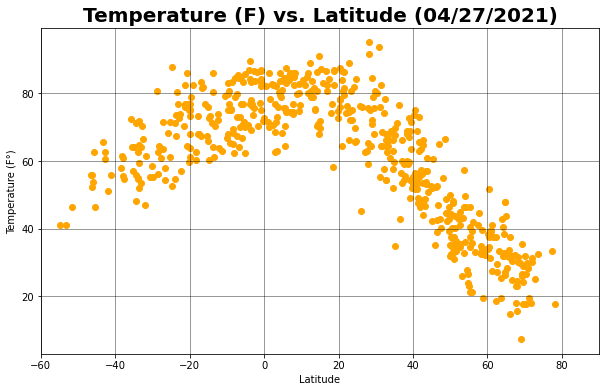

In [5]:
#Temps vs. Latitude
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "orange")
plt.title("Temperature (F) vs. Latitude (04/27/2021)", fontsize=20, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="black", alpha = 0.5)

plt.xlim(-60, 90)

plt.show()

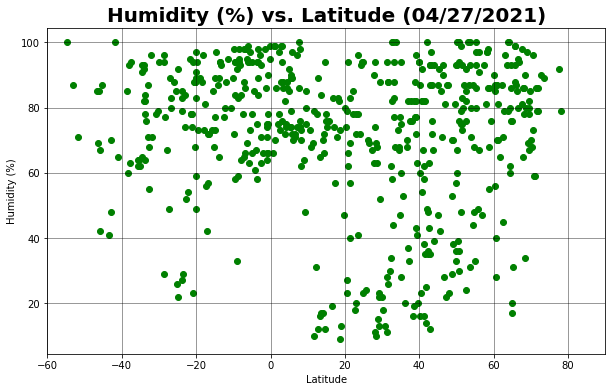

In [6]:
#Humidity vs. Latitude
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "green")
plt.title("Humidity (%) vs. Latitude (04/27/2021)", fontsize=20, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="black", alpha = 0.5)

plt.xlim(-60, 90)

plt.show()

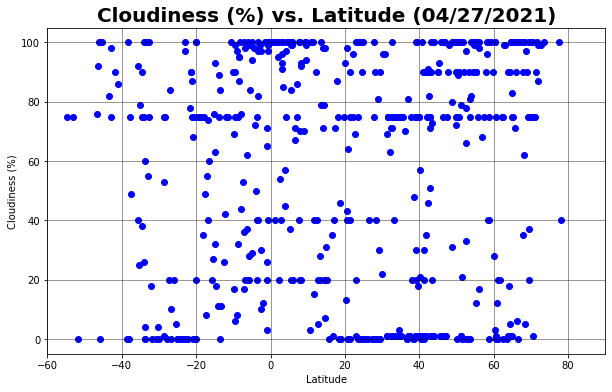

In [7]:
#Cloudiness vs. Latitude
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "blue")
plt.title("Cloudiness (%) vs. Latitude (04/27/2021)", fontsize=20, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="black", alpha = 0.5)

plt.xlim(-60, 90)

plt.show()

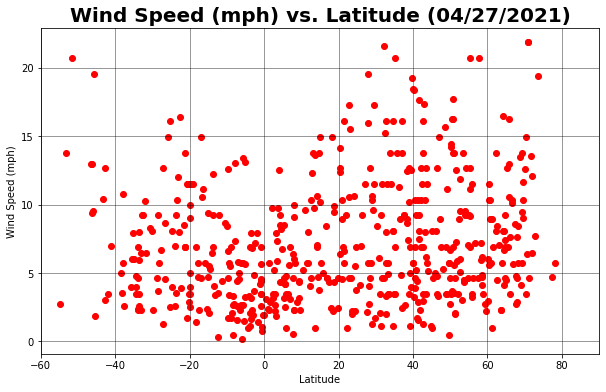

In [8]:
#Wind Speed (mph) vs. Latitude
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Wind_Speed, color = "red")
plt.title("Wind Speed (mph) vs. Latitude (04/27/2021)", fontsize=20, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(color="black", alpha = 0.5)

plt.xlim(-60, 90)

plt.show()

In [ ]:
## Linear Regressions

In [9]:
target_temp = df.Temperature
feature_lat = df.Latitude
target_humid = df.Humidity
target_cloudiness = df.Cloudiness
target_wind = df.Wind_Speed

In [10]:
#Temperature vs Latitude Stats
X = sm.add_constant(feature_lat)
Y = target_temp
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     373.1
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           6.09e-64
Time:                        13:01:46   Log-Likelihood:                -2284.7
No. Observations:                 556   AIC:                             4573.
Df Residuals:                     554   BIC:                             4582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.0214      0.734     92.694      0.000      66.580      69.463
Latitude      -0.3715      0.019    -19.316      0.000      -0.409      -0.334
==============================================================================
Omnibus:                       10.419   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.809
Skew:                          -0.233   Prob(JB):                       0.0122
Kurtosis:                       2.597   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Humidity vs Latitude Stats
X = sm.add_constant(feature_lat)
Y = target_humid
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.817
Date:                Wed, 28 Apr 2021   Prob (F-statistic):             0.0286
Time:                        13:01:50   Log-Likelihood:                -2531.5
No. Observations:                 556   AIC:                             5067.
Df Residuals:                     554   BIC:                             5076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.9193      1.144     63.753      0.000      70.673      75.166
Latitude      -0.0658      0.030     -2.195      0.029      -0.125      -0.007
==============================================================================
Omnibus:                       71.278   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.203
Skew:                          -1.019   Prob(JB):                     7.81e-22
Kurtosis:                       3.210   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#Cloudiness vs Latitude Stats
X = sm.add_constant(feature_lat)
Y = target_cloudiness
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.152
Date:                Wed, 28 Apr 2021   Prob (F-statistic):              0.143
Time:                        13:01:50   Log-Likelihood:                -2820.8
No. Observations:                 556   AIC:                             5646.
Df Residuals:                     554   BIC:                             5654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6298      1.925     28.904      0.000      51.849      59.410
Latitude       0.0740      0.050      1.467      0.143      -0.025       0.173
==============================================================================
Omnibus:                     5402.301   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.918
Skew:                          -0.385   Prob(JB):                     1.32e-14
Kurtosis:                       1.528   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Wind Speed vs Latitude Stats
X = sm.add_constant(feature_lat)
Y = target_wind
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wind_Speed   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     13.64
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           0.000244
Time:                        13:01:52   Log-Likelihood:                -1612.8
No. Observations:                 556   AIC:                             3230.
Df Residuals:                     554   BIC:                             3238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6967      0.219     30.559      0.000       6.266       7.127
Latitude       0.0212      0.006      3.693      0.000       0.010       0.032
==============================================================================
Omnibus:                       59.482   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.108
Skew:                           0.890   Prob(JB):                     2.97e-17
Kurtosis:                       3.339   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.02x + 6.7'

In [15]:
df = pd.read_csv("booth_cities.csv")
df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Khani,41.96,42.96,64.40,60.37,63,1015,8.05,8.05
1,Marang,5.21,103.21,75.09,82.56,94,1010,3.36,3.36
2,Labuhan,-6.88,112.21,81.72,87.93,78,1012,6.51,6.51
3,Ushuaia,-54.80,-68.30,57.20,51.21,54,998,6.93,6.93
4,Lebu,-37.62,-73.65,50.86,46.35,78,1024,5.66,5.66


In [23]:
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_EW"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness,Hemisphere_NS,Hemisphere_EW
0,Khani,41.96,42.96,64.40,60.37,63,1015,8.05,8.05,Northern,Eastern
1,Marang,5.21,103.21,75.09,82.56,94,1010,3.36,3.36,Northern,Eastern
2,Labuhan,-6.88,112.21,81.72,87.93,78,1012,6.51,6.51,Southern,Eastern
3,Ushuaia,-54.80,-68.30,57.20,51.21,54,998,6.93,6.93,Southern,Western
4,Lebu,-37.62,-73.65,50.86,46.35,78,1024,5.66,5.66,Southern,Western


In [33]:
x_values = df['Hemisphere_NS']
y_values = df['Hemisphere_EW']

TypeError: unsupported operand type(s) for /: 'str' and 'int'

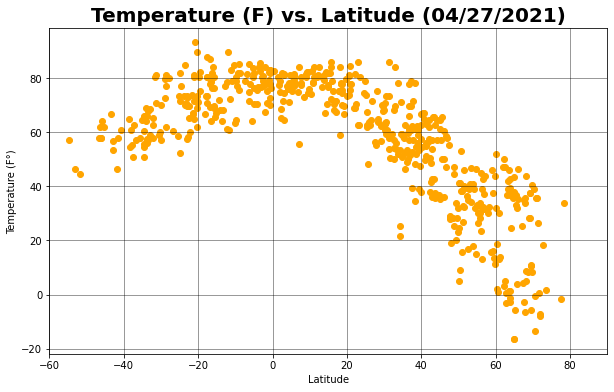

In [36]:
#Temperature vs Latitude
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "orange")
plt.title("Temperature (F) vs. Latitude (04/27/2021)", fontsize=20, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="black", alpha = 0.5)

plt.xlim(-60, 90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()